In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os # accessing directory structure

# For Importing the training data files

In [ ]:
for dirname, _, filenames in os.walk('project_work\\training_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [85]:
nRowsRead = None # specify 'None' if want to read whole file
df1 = pd.read_csv('project_work\\training_data\\train_final.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'train_final.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10258 rows and 62 columns


In [86]:
df1.head(5)

,cpu_user,cpu_nice,cpu_system,cpu_idle,cpu_iowait,cpu_irq,cpu_softirq,cpu_steal,cpu_guest,cpu_guest_nice,...,net_bytes_sent,net_bytes_recv,net_packets_sent,net_packets_recv,net_errin,net_errout,net_dropin,net_dropout,timestamp,crypto_running
0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,...,59074196,71312318,342958,351573,0,0,0,0,1637994049,0
1,0.1,0.0,0.1,99.7,0.1,0,0.0,0.1,0,0,...,59081916,71315002,342976,351600,0,0,0,0,1637994064,0
2,0.1,0.0,0.1,99.7,0.0,0,0.0,0.0,0,0,...,59084204,71316492,342986,351614,0,0,0,0,1637994079,0
3,0.1,0.0,0.0,99.8,0.1,0,0.0,0.0,0,0,...,59096230,71318404,343001,351633,0,0,0,0,1637994094,1
4,0.1,0.0,0.1,99.7,0.0,0,0.0,0.0,0,0,...,59101848,71320972,343020,351663,0,0,0,0,1637994109,1


In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10258 entries, 0 to 10257
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cpu_user                 10258 non-null  float64
 1   cpu_nice                 10258 non-null  float64
 2   cpu_system               10258 non-null  float64
 3   cpu_idle                 10258 non-null  float64
 4   cpu_iowait               10258 non-null  float64
 5   cpu_irq                  10258 non-null  int64  
 6   cpu_softirq              10258 non-null  float64
 7   cpu_steal                10258 non-null  float64
 8   cpu_guest                10258 non-null  int64  
 9   cpu_guest_nice           10258 non-null  int64  
 10  cpu_percent_avg          10258 non-null  int64  
 11  cpu_percent              10258 non-null  float64
 12  cpu_user_0               10258 non-null  float64
 13  cpu_nice_0               10258 non-null  float64
 14  cpu_system_0          

<b> Drop timestamp as it is irrelevant</b>

In [88]:
df1 = df1.drop('timestamp', axis=1)

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10258 entries, 0 to 10257
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cpu_user                 10258 non-null  float64
 1   cpu_nice                 10258 non-null  float64
 2   cpu_system               10258 non-null  float64
 3   cpu_idle                 10258 non-null  float64
 4   cpu_iowait               10258 non-null  float64
 5   cpu_irq                  10258 non-null  int64  
 6   cpu_softirq              10258 non-null  float64
 7   cpu_steal                10258 non-null  float64
 8   cpu_guest                10258 non-null  int64  
 9   cpu_guest_nice           10258 non-null  int64  
 10  cpu_percent_avg          10258 non-null  int64  
 11  cpu_percent              10258 non-null  float64
 12  cpu_user_0               10258 non-null  float64
 13  cpu_nice_0               10258 non-null  float64
 14  cpu_system_0          

In [90]:
X = df1.copy()
X = X.loc[:, X.columns != 'crypto_running']
y = df1["crypto_running"].astype(int)

In [91]:
list(X.columns)

['cpu_user',
 'cpu_nice',
 'cpu_system',
 'cpu_idle',
 'cpu_iowait',
 'cpu_irq',
 'cpu_softirq',
 'cpu_steal',
 'cpu_guest',
 'cpu_guest_nice',
 'cpu_percent_avg',
 'cpu_percent',
 'cpu_user_0',
 'cpu_nice_0',
 'cpu_system_0',
 'cpu_idle_0',
 'cpu_iowait_0',
 'cpu_irq_0',
 'cpu_softirq_0',
 'cpu_steal_0',
 'cpu_guest_0',
 'cpu_guest_nice_0',
 'mem_total',
 'mem_available',
 'mem_percent',
 'mem_used',
 'mem_free',
 'mem_active',
 'mem_inactive',
 'mem_buffers',
 'mem_cached',
 'mem_shared',
 'mem_slab',
 'swap_total',
 'swap_used',
 'swap_free',
 'swap_percent',
 'swap_sin',
 'swap_sout',
 'disk_total',
 'disk_used',
 'disk_free',
 'disk_percent',
 'disk_read_count',
 'disk_write_count',
 'disk_read_bytes',
 'disk_write_bytes',
 'disk_read_time',
 'disk_write_time',
 'disk_read_merged_count',
 'disk_write_merged_count',
 'disk_busy_time',
 'net_bytes_sent',
 'net_bytes_recv',
 'net_packets_sent',
 'net_packets_recv',
 'net_errin',
 'net_errout',
 'net_dropin',
 'net_dropout']

### Using Logistic Regression Classifier

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [93]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
# import the metrics class
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1239,   22],
       [  36, 1268]], dtype=int64)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1261
           1       0.98      0.97      0.98      1304

    accuracy                           0.98      2565
   macro avg       0.98      0.98      0.98      2565
weighted avg       0.98      0.98      0.98      2565



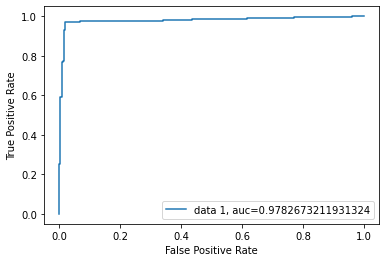

In [127]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Using Decision Tree Classifier


In [124]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [99]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1252    9]
 [   8 1296]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1261
           1       0.99      0.99      0.99      1304

    accuracy                           0.99      2565
   macro avg       0.99      0.99      0.99      2565
weighted avg       0.99      0.99      0.99      2565



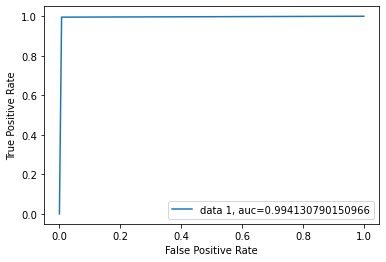

In [128]:
y_pred_proba = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Using KNN Classifier

In [125]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighbors -> argument identifies the amount of neighbors used to ID classification
knn = KNeighborsClassifier(n_neighbors=2)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)
# Use the .predict() method to make predictions from the X_test subset
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1258    3]
 [   8 1296]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       1.00      0.99      1.00      1304

    accuracy                           1.00      2565
   macro avg       1.00      1.00      1.00      2565
weighted avg       1.00      1.00      1.00      2565



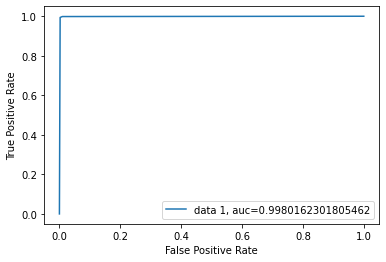

In [129]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### SVM

In [105]:
#Import svm model
from sklearn.svm import SVC

#Create a svm Classifier
svc_1 = SVC(kernel='sigmoid', probability=True) # Linear Kernel

#Train the model using the training sets
svc_1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc_1.predict(X_test)
y_score = svc_1.decision_function(X_test)

#Set a threshold -220
y_score = np.where(y_score > -220, 1, 0)

In [106]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1239   22]
 [  36 1268]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1261
           1       0.98      0.97      0.98      1304

    accuracy                           0.98      2565
   macro avg       0.98      0.98      0.98      2565
weighted avg       0.98      0.98      0.98      2565



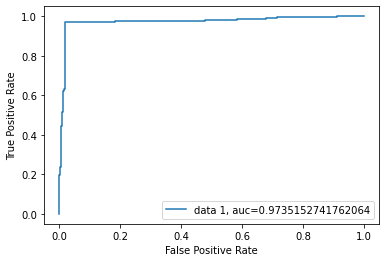

In [130]:
y_pred_proba = svc_1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [108]:
#Create a svm Classifier
svc_rbf = SVC(kernel='rbf', probability=True) # Linear Kernel

#Train the model using the training sets
svc_rbf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc_rbf.predict(X_test)
y_score = svc_rbf.decision_function(X_test)

#Set a threshold -220
y_score = np.where(y_score > -220, 1, 0)

In [109]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1239   22]
 [  36 1268]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1261
           1       0.98      0.97      0.98      1304

    accuracy                           0.98      2565
   macro avg       0.98      0.98      0.98      2565
weighted avg       0.98      0.98      0.98      2565



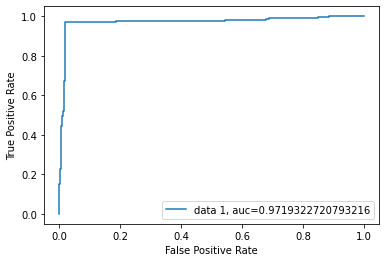

In [126]:
y_pred_proba = svc_rbf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Saving the models

In [111]:
import joblib

In [112]:
joblib.dump(knn, 'project_work\\training_data\\knn_model.pkl')
print("KNN Model dumped!")
joblib.dump(dtc, 'project_work\\training_data\\dtc_model.pkl')
print("Decision Tree Model dumped!")
joblib.dump(logreg, 'project_work\\training_data\\logreg_model.pkl')
print("Logistic Model dumped!")
joblib.dump(svc_1, 'project_work\\training_data\\svc_sigmoid.pkl')
print("SVC Sigmoid Model dumped!")
joblib.dump(svc_rbf, 'project_work\\training_data\\svc_rbf.pkl')
print("SVC RBF Model dumped!")

KNN Model dumped!
Decision Tree Model dumped!
Logistic Model dumped!
SVC Sigmoid Model dumped!
SVC RBF Model dumped!


In [113]:
model_columns = list(X.columns)
joblib.dump(model_columns, 'project_work\\training_data\\model_columns.pkl')
print("Models columns dumped!")

Models columns dumped!


<b>Verifying that model dump was success</b>

In [114]:
knn_loaded = joblib.load('project_work\\training_data\\knn_model.pkl')

<b> Testing model prediction with sample data </b>

In [115]:
from io import StringIO
test=StringIO("cpu_user,cpu_nice,cpu_system,cpu_idle,cpu_iowait,cpu_irq,cpu_softirq,cpu_steal,cpu_guest,cpu_guest_nice,cpu_percent_avg,cpu_percent,cpu_user_0,cpu_nice_0,cpu_system_0,cpu_idle_0,cpu_iowait_0,cpu_irq_0,cpu_softirq_0,cpu_steal_0,cpu_guest_0,cpu_guest_nice_0,mem_total,mem_available,mem_percent,mem_used,mem_free,mem_active,mem_inactive,mem_buffers,mem_cached,mem_shared,mem_slab,swap_total,swap_used,swap_free,swap_percent,swap_sin,swap_sout,disk_total,disk_used,disk_free,disk_percent,disk_read_count,disk_write_count,disk_read_bytes,disk_write_bytes,disk_read_time,disk_write_time,disk_read_merged_count,disk_write_merged_count,disk_busy_time,net_bytes_sent,net_bytes_recv,net_packets_sent,net_packets_recv,net_errin,net_errout,net_dropin,net_dropout\n2,0,1,0,0,0,0,0,0,0,140,100,2,0,1,0,0,0,0,0,0,0,1016025088,692858880,31.8,168185856,466272256,132165632,304832512,24055808,357511168,851968,60219392,0,0,0,0,0,0,10340794368,4195700736,6128316416,40.6,10074,1449,397808128,12132352,34208,12758,3198,404,42740,145824,91657,881,728,0,0,0,0")
test_df=pd.read_csv(test)
test_df = test_df.select_dtypes(exclude=['object'])
test_df


,cpu_user,cpu_nice,cpu_system,cpu_idle,cpu_iowait,cpu_irq,cpu_softirq,cpu_steal,cpu_guest,cpu_guest_nice,...,disk_write_merged_count,disk_busy_time,net_bytes_sent,net_bytes_recv,net_packets_sent,net_packets_recv,net_errin,net_errout,net_dropin,net_dropout
0,2,0,1,0,0,0,0,0,0,0,...,404,42740,145824,91657,881,728,0,0,0,0


In [116]:
test_df.columns
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cpu_user                 1 non-null      int64  
 1   cpu_nice                 1 non-null      int64  
 2   cpu_system               1 non-null      int64  
 3   cpu_idle                 1 non-null      int64  
 4   cpu_iowait               1 non-null      int64  
 5   cpu_irq                  1 non-null      int64  
 6   cpu_softirq              1 non-null      int64  
 7   cpu_steal                1 non-null      int64  
 8   cpu_guest                1 non-null      int64  
 9   cpu_guest_nice           1 non-null      int64  
 10  cpu_percent_avg          1 non-null      int64  
 11  cpu_percent              1 non-null      int64  
 12  cpu_user_0               1 non-null      int64  
 13  cpu_nice_0               1 non-null      int64  
 14  cpu_system_0             1 non

In [117]:
prediction = list(knn_loaded.predict(test_df))

In [118]:
prediction

[0]

In [119]:
str1 = "cpu_user,cpu_nice,cpu_system,cpu_idle,cpu_iowait,cpu_irq,cpu_softirq,cpu_steal,cpu_guest,cpu_guest_nice,cpu_percent_avg,cpu_percent,cpu_user_0,cpu_nice_0,cpu_system_0,cpu_idle_0,cpu_iowait_0,cpu_irq_0,cpu_softirq_0,cpu_steal_0,cpu_guest_0,cpu_guest_nice_0,mem_total,mem_available,mem_percent,mem_used,mem_free,mem_active,mem_inactive,mem_buffers,mem_cached,mem_shared,mem_slab,swap_total,swap_used,swap_free,swap_percent,swap_sin,swap_sout,disk_total,disk_used,disk_free,disk_percent,disk_read_count,disk_write_count,disk_read_bytes,disk_write_bytes,disk_read_time,disk_write_time,disk_read_merged_count,disk_write_merged_count,disk_busy_time,net_bytes_sent,net_bytes_recv,net_packets_sent,net_packets_recv,net_errin,net_errout,net_dropin,net_dropout\n"
str2 = "18.2,0,0.2,0,0,0,0,81.6,0,0,103,100,18.2,0,0.2,0,0,0,0,81.6,0,0,1016025088,339738624,66.6,519102464,86519808,170053632,635641856,46600192,363802624,856064,68943872,0,0,0,0,0,0,10340794368,4190416896,6133600256,40.6,23515,95771,938340864,845168640,114927,335300,7277,32509,226736,53887932,59045448,318634,322793,0,0,0,0"
test=StringIO(str1+str2)
test_df=pd.read_csv(test)
test_df = test_df.select_dtypes(exclude=['object'])
test_df

,cpu_user,cpu_nice,cpu_system,cpu_idle,cpu_iowait,cpu_irq,cpu_softirq,cpu_steal,cpu_guest,cpu_guest_nice,...,disk_write_merged_count,disk_busy_time,net_bytes_sent,net_bytes_recv,net_packets_sent,net_packets_recv,net_errin,net_errout,net_dropin,net_dropout
0,18.2,0,0.2,0,0,0,0,81.6,0,0,...,32509,226736,53887932,59045448,318634,322793,0,0,0,0


In [120]:
prediction = list(knn_loaded.predict(test_df))
prediction

[0]

In [121]:
prediction = list(dtc.predict(test_df))
prediction

[0]

In [122]:
prediction = list(svc_1.predict(test_df))
prediction

[1]

In [123]:
prediction = list(svc_rbf.predict(test_df))
prediction

[1]